# **UW AI4ALL Robot Competition**

By: Abigail Batinga and Tapan Khanal

In [ ]:
# Mount notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import necessary datasets
import os
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle   

# **Preprocessing Images**

In [ ]:
def processData(subDir):
  # Storing images and labels as numpy arrays
  dataPath = '/content/drive/My Drive/numbers_data/'

  images = []
  labels = []
  
  for i in range(0, 10):
    for fileName in os.listdir(dataPath + subDir + '/' + str(i) + '/'):
      if fileName.endswith("jpg"):
        labels.append(fileName[0])
        img = cv2.imread(dataPath + subDir + '/' + str(i) + '/' + fileName)
        images.append(img)
      
  # Transform into numpy arrays
  images = np.array(images, dtype = 'float32')
  labels = np.array(labels, dtype = 'int32')

  return images, labels

In [ ]:
trainImages, trainLabels = processData('train')

In [ ]:
trainImages, trainLabels = shuffle(trainImages, trainLabels, random_state=25)

In [ ]:
testImages, testLabels = processData('test')

In [ ]:
n_train = trainLabels.shape[0]
n_test = testLabels.shape[0]

print(n_train)
print(n_test)

3093
1020


In [ ]:
# Scale the data
trainImages = trainImages/255.0
testImages = testImages/255.0

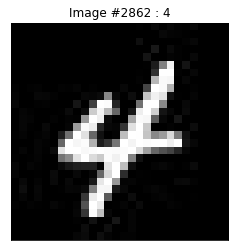

In [ ]:
# Visualize random image
index = np.random.randint(trainImages.shape[0])
plt.figure()
plt.imshow(trainImages[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + str(trainLabels[index]))
plt.show()

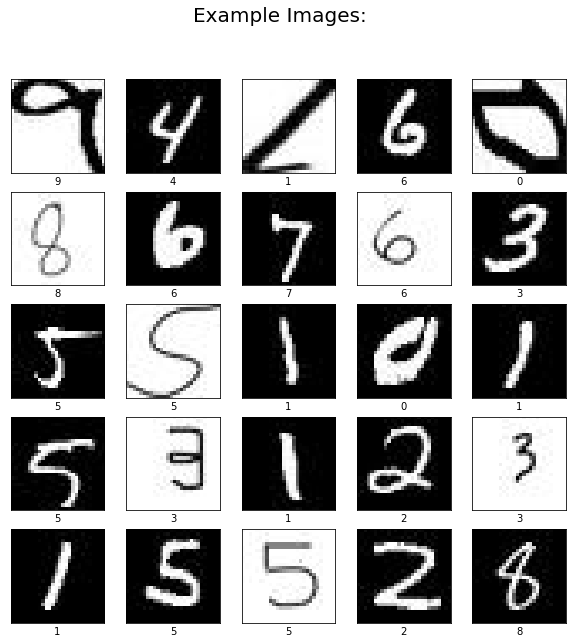

In [ ]:
# Visualize images with labels
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Example Images:", fontsize = 20)
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainImages[i], cmap=plt.cm.binary)
  plt.xlabel(str(trainLabels[i]))

plt.show()

# **CNN in Keras**

Model 1: reached 85% accuracy

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

NameError: ignored

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
history = model.fit(trainImages, trainLabels, batch_size=128, epochs=20, validation_split = 0.25)

Epoch 1/20
19/19 [==============================] - 2s 92ms/step - loss: 2.0294 - accuracy: 0.3126 - val_loss: 1.5487 - val_accuracy: 0.5439
Epoch 2/20
19/19 [==============================] - 2s 85ms/step - loss: 1.2991 - accuracy: 0.5817 - val_loss: 1.1248 - val_accuracy: 0.6240
Epoch 3/20
19/19 [==============================] - 2s 86ms/step - loss: 1.0211 - accuracy: 0.6593 - val_loss: 0.8953 - val_accuracy: 0.7119
Epoch 4/20
19/19 [==============================] - 2s 86ms/step - loss: 0.7984 - accuracy: 0.7486 - val_loss: 0.7584 - val_accuracy: 0.7700
Epoch 5/20
19/19 [==============================] - 2s 85ms/step - loss: 0.6752 - accuracy: 0.7861 - val_loss: 0.7691 - val_accuracy: 0.7623
Epoch 6/20
19/19 [==============================] - 2s 85ms/step - loss: 0.6005 - accuracy: 0.8077 - val_loss: 0.6324 - val_accuracy: 0.7959
Epoch 7/20
19/19 [==============================] - 2s 86ms/step - loss: 0.5144 - accuracy: 0.8353 - val_loss: 0.6010 - val_accuracy: 0.8088
Epoch 8/20
19

In [ ]:
testLoss = model.evaluate(testImages, testLabels)

32/32 [==============================] - 0s 9ms/step - loss: 0.5283 - accuracy: 0.8598


Text(0.5, 1.0, 'Image #824 : 8, true:8')

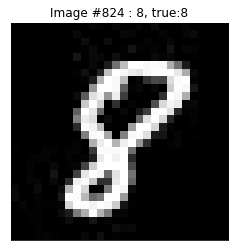

In [ ]:
predictions = model.predict(testImages)
predLabels = np.argmax(predictions, axis=1)

index = np.random.randint(testImages.shape[0])
plt.figure()
plt.imshow(testImages[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + str(predLabels[index]) + ', true:' + str(testLabels[index]))

In [ ]:
print("The number of training examples is: " + str(trainImages.shape[0]))
print("The number of features is: " + str(trainImages.shape[1]))

The number of training examples is: 3093
The number of features is: 28


# **SVM and KNN Classifier**

SVM didn't do too well. 65% accuracy at most.
KNN reached 80% accuracy.

In [ ]:
def processData(subDir1):
  # Storing images and labels as numpy arrays
  dataPath = '/content/drive/My Drive/numbers_data/'

  images = []
  labels = []
  
  for i in range(0, 10):
    for fileName in os.listdir(dataPath + subDir1 + '/' + str(i) + '/'):
      if fileName.endswith("jpg"):
        labels.append(fileName[0])
        img = cv2.imread(dataPath + subDir1 + '/' + str(i) + '/' + fileName)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        print(fileName)

  # for i in range(0, 10):
  #   for fileName in os.listdir(dataPath + subDir2 + '/' + str(i) + '/'):
  #     if fileName.endswith("jpg"):
  #       labels.append(fileName[0])
  #       img = cv2.imread(dataPath + subDir2 + '/' + str(i) + '/' + fileName)
  #       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #       images.append(img)
      
  # Transform into numpy arrays
  images = np.array(images, dtype = 'float32')
  labels = np.array(labels, dtype = 'int32')

  return images, labels

In [ ]:
# Store data and targets
data, targets = processData('train')

0_25.jpg
0_170.jpg
0_36.jpg
0_33.jpg
0_207.jpg
0_217.jpg
0_171.jpg
0_24.jpg
0_173.jpg
0_27.jpg
0_30.jpg
0_37.jpg
0_18.jpg
0_31.jpg
0_211.jpg
0_148.jpg
0_199.jpg
0_22.jpg
0_358.jpg
0_202.jpg
0_19.jpg
0_349.jpg
0_26.jpg
0_210.jpg
0_9.jpg
0_164.jpg
0_160.jpg
0_159.jpg
0_32.jpg
0_203.jpg
0_359.jpg
0_174.jpg
0_158.jpg
0_216.jpg
0_167.jpg
0_161.jpg
0_198.jpg
0_166.jpg
0_149.jpg
0_165.jpg
0_212.jpg
0_206.jpg
0_204.jpg
0_205.jpg
0_172.jpg
0_238.jpg
0_239.jpg
0_163.jpg
0_215.jpg
0_177.jpg
0_213.jpg
0_23.jpg
0_175.jpg
0_188.jpg
0_8.jpg
0_56.jpg
0_128.jpg
0_282.jpg
0_118.jpg
0_292.jpg
0_50.jpg
0_326.jpg
0_119.jpg
0_55.jpg
0_139.jpg
0_42.jpg
0_214.jpg
0_68.jpg
0_258.jpg
0_270.jpg
0_274.jpg
0_124.jpg
0_229.jpg
0_104.jpg
0_134.jpg
0_307.jpg
0_323.jpg
0_115.jpg
0_129.jpg
0_296.jpg
0_201.jpg
0_77.jpg
0_130.jpg
0_64.jpg
0_86.jpg
0_78.jpg
0_84.jpg
0_328.jpg
0_44.jpg
0_302.jpg
0_272.jpg
0_93.jpg
0_252.jpg
0_228.jpg
0_333.jpg
0_288.jpg
0_269.jpg
0_66.jpg
0_80.jpg
0_116.jpg
0_285.jpg
0_287.jpg
0_62.jpg
0_3

In [ ]:
# Scale data
data = data/255.0

In [ ]:
# Flatten images
numOfSamples = len(data)
print(data.shape)
dataImages = data.reshape(numOfSamples, -1)
print(dataImages.shape)

(3093, 28, 28)
(3093, 784)


In [ ]:
print(targets.shape)

(3093,)


In [ ]:
# Save numpy array as text file
fil = open("train.txt", "w")
np.savetxt(fil)
fil.close()

In [ ]:
# Save labels
out = open("trainLabel.txt", "w") 
np.savetxt(out, targets)

In [ ]:
trainPath = '/content/train.txt'
trainLabelsPath = '/content/trainLabel.txt'

In [ ]:
dataImgs = np.loadtxt(trainPath)

In [ ]:
trainLabels = np.loadtxt(trainLabelsPath)

In [ ]:
print(trainLabels.shape)

(3093,)


In [ ]:
data_ = dataImgs.reshape(3093, 784)
print(data_.shape)

(3093, 784)


In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_, trainLabels, test_size=.25,
                                                    shuffle=False)

print('Training data and target sizes: ' + str(X_train.shape) + ' ' + str(y_train.shape))

Training data and target sizes: (2319, 784) (2319,)


In [ ]:
# SVM Classifier
from sklearn import svm, metrics

classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Make predictions on test images
y_pred = classifier.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.91      0.43        89
           1       0.74      0.74      0.74       109
           2       0.69      0.56      0.62       108
           3       0.84      0.74      0.79       102
           4       0.80      0.72      0.76       101
           5       0.78      0.60      0.68       101
           6       0.85      0.63      0.72       102
           7       0.92      0.65      0.76       100
           8       0.77      0.52      0.62       105
           9       0.91      0.54      0.68       112

    accuracy                           0.66      1029
   macro avg       0.76      0.66      0.68      1029
weighted avg       0.77      0.66      0.68      1029



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

65.79203109815354


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        89
           1       0.65      0.91      0.76       109
           2       0.82      0.64      0.72       108
           3       0.85      0.86      0.86       102
           4       0.82      0.79      0.81       101
           5       0.75      0.80      0.78       101
           6       0.85      0.83      0.84       102
           7       0.81      0.87      0.84       100
           8       0.85      0.69      0.76       105
           9       0.82      0.68      0.74       112

    accuracy                           0.79      1029
   macro avg       0.80      0.80      0.79      1029
weighted avg       0.80      0.79      0.79      1029



In [ ]:
print(accuracy_score(y_test, predictions)*100)

79.30029154518951


# **Decision Tree Classifier and Random Forest Classifier**

Decision tree classifier performed worst at about 60% accuracy. Random forest did fairly well at 82.5 % accuracy.

In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier()
treeClf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = treeClf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred)*100)

59.7667638483965


In [ ]:
# Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
randClf = RandomForestClassifier(random_state=42)
randClf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
preds = randClf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        89
           1       0.85      0.89      0.87       109
           2       0.79      0.79      0.79       108
           3       0.87      0.82      0.84       102
           4       0.88      0.80      0.84       101
           5       0.73      0.84      0.78       101
           6       0.83      0.83      0.83       102
           7       0.86      0.89      0.88       100
           8       0.86      0.72      0.79       105
           9       0.83      0.77      0.80       112

    accuracy                           0.83      1029
   macro avg       0.83      0.83      0.83      1029
weighted avg       0.83      0.83      0.82      1029



In [ ]:
print('Random forests classifier accuracy is:', accuracy_score(y_test, preds)*100)

Random forests classifier accuracy is: 82.5072886297376


In [ ]:
# Predict on random test image
randIndex = np.random.randint(X_test.shape[0])

# Display image
img = X_test[randIndex].reshape(28, 28)
plt.matshow(img)

# Print prediction for that image
pr = randClf.predict(X_test)
print(pr[randIndex])

# **Robot test code**

In [ ]:
# Import ev3 modules
from ev3dev2.button import Button
from ev3dev2.sensor.lego import TouchSensor, InfraredSensor
from ev3dev2.sound import Sound
from time import sleep

# Initialize buttons and sensors
sound = Sound()
btn = Button()
touchSensor = TouchSensor()
leds = Leds()


# While no button is pressed, wait .01 second
while not btn.any():
  sleep(0.01)

# TO-DO: replace 'model' with the Sklearn classifier from above you want to use
# OR: use Keras classifier
predictions = model.predict(X_test) # TO-DO: replace with your test data

# Get random value from test images
randIdx = np.random.randint(X_test.shape[0])

# Store predicted label of random test image
predictedLabel = predictions[randIdx]
trueLabel = y_test[randIdx]

leds.all_off()
# Stop program by pressing touch sensor
while not touchSensor.ispressed:

  # Check for correct label
  if predictedLabel == trueLabel: # if correct, LEDs will be green
    leds.set_color('LEFT', 'GREEN')
    leds.set_color('RIGHT', 'GREEN')

    # Test with sound as well
    sound.beep()
    strCorrectSound = "Correct label, model predicted" + predictedLabel
    sound.speak(strCorrectSound)

  else: # if wrong, they will be red
    leds.set_color('LEFT', 'GREEN')
    leds.set_color('RIGHT', 'GREEN')

    # Test with sound as well
    sound.beep()
    strWrongSound = "Incorrect label, true label is" + trueLabel + "model predicted" + predictedLabel
    sound.speak(strWrongSound)